In [20]:
%matplotlib inline
import collections
import sys
import subprocess
import pandas as pd
import os
import numpy as np
import uuid
import tempfile
import bnpy
import scikit_posthocs as sp
import itertools

from scipy.stats import kruskal, f_oneway
from scipy.stats import ttest_ind

sys.path.append('/opt/hydra/')

src = os.environ["HYDRA_SRC"]

import library.analysis as hy

In [2]:
# This cmd was used to identify multimodal genes 
cmd = ["docker" ,
       "run",
       "-v", "$PWD:/data",
       "jpfeil/hydra@sha256:123bee0aa2b3e63084c773a13a16d247076462af910a104cd5776ba5e6d4b29d",
       "filter",
       "-e", "data/TARGET-osteosarcoma-2019-02-02.tsv",
       "--output-dir", "output",
       "--CPU", "13"]

In [2]:
mm_genes = '../osteo/TH-OSTEO-MINUS-TARGET/MultiModalGenes/'
exp_path = '../osteo/TH-OSTEO-MINUS-TARGET.tsv'

In [3]:
exp = pd.read_csv(exp_path, sep='\t', index_col=0)

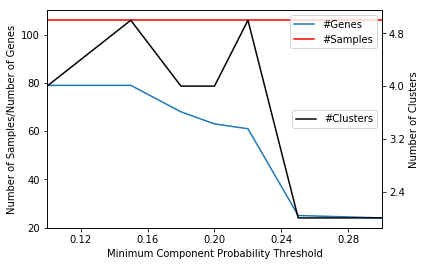

In [7]:
scan = hy.ScanEnrichmentAnalysis(mm_genes, 
                                 exp_path, 
                                 'GO', 
                                 min_prob_range=[0.1, 0.15, 0.18, 0.2, 0.22, 0.25, 0.3], 
                                 CPU=7,
                                 K=5).scan()

In [8]:
scan

,num_genesets,gs_terms,gs_term_genes,num_genes,num_clusters,num_samples
min_prob_filter,,,,,,
0.10,4,"complement activation, classical pathway|anter...",IGKV4-1|CLDN11|SYTL1|SYT15|IGHV3-15|IGHV4-61|C...,79,4,106
0.15,4,"complement activation, classical pathway|anter...",IGKV4-1|CLDN11|SYTL1|SYT15|IGHV3-15|GRIA3|CLDN...,79,5,106
0.18,3,"complement activation, classical pathway|anter...",IGKV4-1|CLDN11|SYTL1|SYT15|IGHV3-15|GRIA3|CLDN...,68,4,106
0.20,3,"complement activation, classical pathway|anter...",IGKV4-1|CLDN11|SYTL1|IGHV3-15|GRIA3|IGHV1-18|I...,63,4,106
0.22,3,"complement activation, classical pathway|anter...",IGKV4-1|CLDN11|SYTL1|IGHV3-15|GRIA3|IGHV1-18|I...,61,5,106
0.25,1,"complement activation, classical pathway",IGKV4-1|IGHV3-15|IGKV1-16|IGKV1-17|IGHG3|IGKV1...,25,2,106
0.30,1,"complement activation, classical pathway",IGKV4-1|IGHV3-15|IGKV1-16|IGKV1-17|IGHG3|IGKV1...,24,2,106


In [9]:
res = hy.EnrichmentAnalysis(exp_path=exp_path,
                            mm_path=mm_genes,
                            min_prob_filter=0.22,
                            min_effect_filter=1.0,
                            gmt_path='GO')

In [10]:
res.get_enriched_terms()

,Unnamed: 0,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
0,GO:0006958,GO:0006958,"complement activation, classical pathway",26/349,74/11850,1.142320e-21,3.405255e-18,3.206913e-18,IGHV3-15/IGHV1-18/IGHG3/IGKV1D-39/IGKV3-15/IGH...,26
1,GO:0098916,GO:0098916,anterograde trans-synaptic signaling,25/349,321/11850,9.195127e-06,7.213335e-04,6.793186e-04,PNOC/SLC17A7/RIMS4/LAMA2/PPFIA4/GLRA3/DKK1/CHR...,25
2,GO:0098742,GO:0098742,cell-cell adhesion via plasma-membrane adhesio...,13/349,122/11850,6.092136e-05,3.632132e-03,3.420574e-03,PCDHGA10/NRXN1/CLDN1/CADM4/CADM3/PCDHB9/PCDHB2...,13


In [11]:
genes = res.get_enriched_term_genes()

len(genes)

61

In [12]:
clus = hy.MultivariateMixtureModel(data=exp.reindex(genes),
                                   center=True,
                                   gamma=5.0,
                                   variance=2.0,
                                   K=2, 
                                   verbose=True)

centering data


In [16]:
clus.clusters

defaultdict(list,
            {0: ['TH27_1169_S01',
              'TH06_1172_S01',
              'TH27_1267_S01',
              'TH27_1271_S01',
              'TH27_1357_S01',
              'TH03_0139_S01',
              'TH27_1402_S01',
              'TH03_0160_S01',
              'THR24_2086_S01',
              'THR24_2088_S01',
              'THR24_2090_S01',
              'THR24_2091_S01',
              'THR24_2092_S01',
              'THR24_2093_S01',
              'THR24_2096_S01',
              'THR24_2098_S01',
              'THR24_2099_S01',
              'THR24_2101_S01',
              'THR24_2102_S01',
              'THR24_2104_S01',
              'THR24_2105_S01',
              'THR24_2107_S01',
              'TH03_0022_S01',
              'TH03_0296_S01',
              'TH03_0296_S05',
              'THR15_0330_S01',
              'THR15_0334_S01',
              'THR15_0337_S01',
              'THR15_0339_S01',
              'THR15_0342_S01',
              'THR15_0343_S01'

In [21]:
assignments = clus.get_assignments(exp.reindex(genes))

assign = pd.DataFrame(index=exp.columns,
                      columns=[1])

for sample, assignment in zip(exp.columns, assignments):
    assign.loc[sample, 1] = assignment + 1

In [24]:
hclust = hy.HClust(data=exp.reindex(genes))

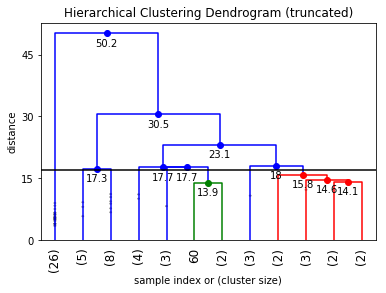

In [25]:
hclust.plot_row_linkage(17)
row_groups = hclust.get_row_groups(17)

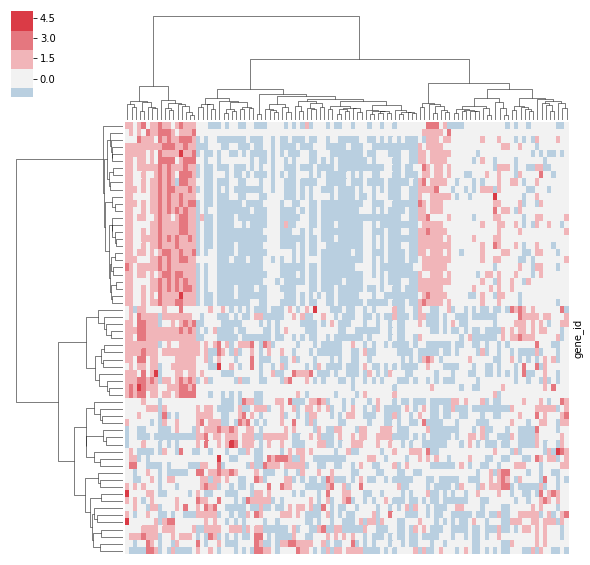

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

#col_order = assign.sort_values(1).index.values

g = sns.clustermap(exp.reindex(genes).dropna(),
                   z_score=0,
                   method='ward',
                   center=0,
                   cmap=sns.diverging_palette(240, 10, n=7),
                   figsize=(10, 10))

ax = g.ax_heatmap

ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])

pth = 'img/expression-heatmap.svg'
plt.savefig(pth, format='svg', bbox_inches='tight')

In [27]:
help(hy.n1)

Help on function n1 in module library.analysis:

n1(zscore, gmt=None)
    N-of-1 GSEA. GMT annotation must matched expression annotation
    
    :param zscore: Ranked dataframe
    :param gmt: Path to GSEA GMT file
    :return: GSEA Dataframe



In [28]:
fgseas = {}
for cluster, rows in assign.groupby(1):
    ins = rows.index.values
    outs = [x for x in exp.columns if x not in ins]
    
    r = ttest_ind(exp[ins].values,
                  exp[outs].values,
                  axis=1).statistic
                    
    tstats = pd.DataFrame(index=exp.index, 
                          data=r).dropna()
                          
    tstats = tstats.sort_values(0, ascending=False)
    
    fgseas[cluster] = hy.n1(tstats)

In [38]:
t = fgseas[1]

t[(t['padj'] < 0.05) & (t['ES'] > 0)].sort_values('NES', ascending=False)

,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
pathway,,,,,,,
HALLMARK_MYC_TARGETS_V1%MSIGDB_C2%HALLMARK_MYC_TARGETS_V1,0.000322,0.003304,0.541989,4.252110,0,200,TUFM|CCT3|CCT4|H2AFZ|MAD2L1|CDC20|PRDX4|EPRS|K...
TRANSLATION%REACTOME%R-HSA-72766.3,0.000413,0.004046,0.496569,4.143791,0,289,TUFM|SEC61G|MRPL55|EIF4EBP1|YARS2|EPRS|MRPS7|M...
CHROMOSOME MAINTENANCE%REACTOME DATABASE ID RELEASE 66%73886,0.000228,0.002718,0.629814,4.103874,0,87,CENPN|H2AFZ|HIST1H2AE|HIST1H2BG|HIST1H2BJ|H2AF...
NUCLEOSOME ASSEMBLY%REACTOME%R-HSA-774815.1,0.000199,0.002690,0.710542,4.075564,0,53,CENPN|H2AFZ|HIST1H2AE|HIST1H2BG|HIST1H2BJ|H2AF...
DEPOSITION OF NEW CENPA-CONTAINING NUCLEOSOMES AT THE CENTROMERE%REACTOME DATABASE ID RELEASE 66%606279,0.000199,0.002690,0.710542,4.075564,0,53,CENPN|H2AFZ|HIST1H2AE|HIST1H2BG|HIST1H2BJ|H2AF...
HALLMARK_E2F_TARGETS%MSIGDB_C2%HALLMARK_E2F_TARGETS,0.000322,0.003304,0.509087,3.993982,0,200,H2AFZ|MAD2L1|TK1|CHEK1|BIRC5|CDC20|MTHFD2|PRDX...
MITOCHONDRIAL TRANSLATION ELONGATION%REACTOME DATABASE ID RELEASE 66%5389840,0.000228,0.002718,0.611116,3.982038,0,87,TUFM|MRPL55|MRPS7|MRPL12|MRPL27|MRPL17|MRPL21|...
MITOCHONDRIAL TRANSLATIONAL ELONGATION%GOBP%GO:0070125,0.000228,0.002718,0.605069,3.960200,0,88,TUFM|MRPL55|MRPS7|MRPL12|MRPL27|MRPL17|MRPL21|...
MITOCHONDRIAL TRANSLATION INITIATION%REACTOME DATABASE ID RELEASE 66%5368286,0.000228,0.002718,0.603829,3.934557,0,87,MRPL55|MRPS7|MRPL12|MRPL27|MRPL17|MRPL21|MRPS1...


In [16]:
pth = 'data/xCell_TARGET-osteosarcoma-2019-02-02_xCell_1553020819.txt'
xcell = pd.read_csv(pth, sep='\t', index_col=0)
xcell.columns = [x.replace('.', '-') for x in xcell.columns]

In [17]:
igroups = dict((group, []) for group in assign[1].unique())
data = pd.DataFrame(columns=['sample', 
                             'cluster', 
                             'source', 
                             'feature', 
                             'value'])

for sample in assign.index.values:
  
    assignment = assign.loc[sample, 1]
    
    if pd.isnull(assignment):
        continue
    
    igroups[assignment].append(sample)
        
    for cell, value in xcell[sample].iteritems():
        data.loc[len(data), :] = [sample, assignment, 'xCell', cell, value]
        
skip = ['P-value', 'Pearson Correlation', 'RMSE']

data = data[~data['feature'].isin(skip)]
        
data['value'] = pd.to_numeric(data['value'])

In [18]:
data

,sample,cluster,source,feature,value
0,TARGET-40-0A4HMC-01A-01R,1,xCell,Adipocytes,0.0000
1,TARGET-40-0A4HMC-01A-01R,1,xCell,Astrocytes,0.0000
2,TARGET-40-0A4HMC-01A-01R,1,xCell,B-cells,0.0000
3,TARGET-40-0A4HMC-01A-01R,1,xCell,Basophils,0.0990
4,TARGET-40-0A4HMC-01A-01R,1,xCell,CD4+ T-cells,0.0000
5,TARGET-40-0A4HMC-01A-01R,1,xCell,CD4+ Tcm,0.0095
6,TARGET-40-0A4HMC-01A-01R,1,xCell,CD4+ Tem,0.0212
7,TARGET-40-0A4HMC-01A-01R,1,xCell,CD4+ memory T-cells,0.0000
8,TARGET-40-0A4HMC-01A-01R,1,xCell,CD4+ naive T-cells,0.0000
9,TARGET-40-0A4HMC-01A-01R,1,xCell,CD8+ T-cells,0.0000


In [19]:
from scipy.stats import kruskal, f_oneway
import collections
import scikit_posthocs as sp
import itertools

sigs = collections.defaultdict(list)

p_values = pd.DataFrame(columns=['source', 
                                 'feature', 
                                 'A', 
                                 'B', 
                                 'holm p-value'])

targets = ['Neutrophils']

for source, rows in data.groupby('source'):
    
    #rows = rows[rows['feature'].isin(targets)]
    
    print(source)
    print()
    nfeatures = len(rows['feature'].unique())
    alpha = 1 - (1 - 0.05) ** (1.0 / nfeatures)
    print(alpha)
    for feature in rows['feature'].unique():
        print(feature)
        groups3 = []
        for i, rows in data[data['feature'] == feature].groupby('cluster'):
            groups3.append(list(rows['value'].values))
    
        try:
            stat, pvalue = kruskal(*groups3)
            print(feature, pvalue, pvalue < alpha)
        
        except:
            continue
    
        if pvalue < alpha:
            sigs[source].append(feature)
            
            res = sp.posthoc_mannwhitney(groups3, 
                                         p_adjust='holm')
            
            for i, j in itertools.combinations(range(len(groups3)),
                                               2):
                
                if i == j:
                    continue 
                    
                p_values.loc[len(p_values), :] = [source,
                                                  feature,
                                                  i, 
                                                  j,
                                                  res[i, j]]

xCell
()
0.000765278582887
Adipocytes
('Adipocytes', 0.9743175589238652, False)
Astrocytes
('Astrocytes', 0.7802701881505455, False)
B-cells
('B-cells', 0.9657669061460595, False)
Basophils
('Basophils', 0.2971943126114361, False)
CD4+ T-cells
CD4+ Tcm
('CD4+ Tcm', 0.8438962274795001, False)
CD4+ Tem
('CD4+ Tem', 0.4244589112642786, False)
CD4+ memory T-cells
('CD4+ memory T-cells', 0.7653198922641393, False)
CD4+ naive T-cells
('CD4+ naive T-cells', 0.9382648647755556, False)
CD8+ T-cells
('CD8+ T-cells', 0.5524500177226077, False)
CD8+ Tcm
('CD8+ Tcm', 0.23910990456370326, False)
CD8+ Tem
('CD8+ Tem', 0.1831435480244612, False)
CD8+ naive T-cells
('CD8+ naive T-cells', 0.26733234070731027, False)
CLP
('CLP', 0.9065483600103746, False)
CMP
('CMP', 0.32527142355791183, False)
Chondrocytes
('Chondrocytes', 0.05844655427860737, False)
Class-switched memory B-cells
('Class-switched memory B-cells', 0.5503615888324735, False)
DC
('DC', 0.9375217237411397, False)
Endothelial cells
('Endothe

KeyError: (0, 1)

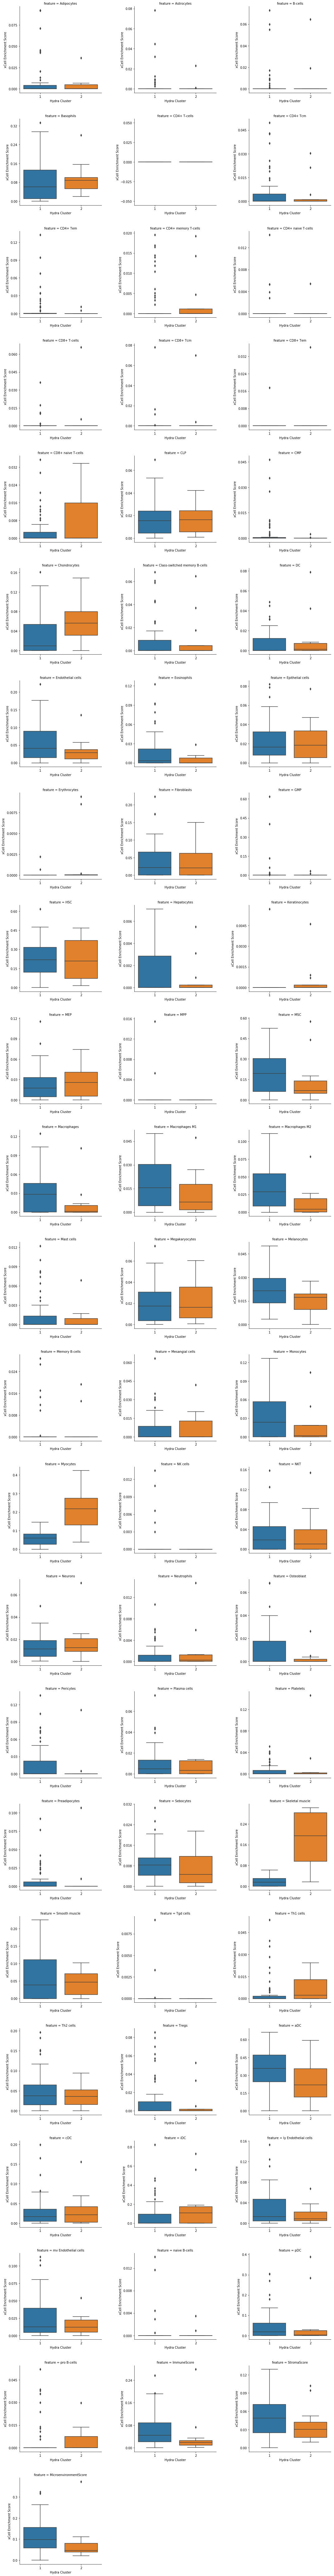

In [20]:
mask = (data['source'] == 'xCell') #& (data['feature'].isin(sigs['xCell']))

t = data[mask]

g = sns.catplot(x='cluster', 
                y='value', 
                col='feature',
                kind='box',
                col_wrap=3,
                sharex=False,
                sharey=False,
                data=t)

for i in range(len(g.axes)):
    g.axes[i].set_xlabel('Hydra Cluster')
    g.axes[i].set_ylabel('xCell Enrichment Score')
    
plt.subplots_adjust(hspace=0.3, wspace=0.4)

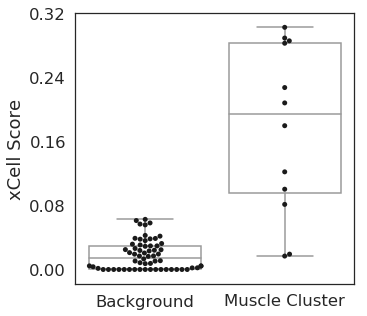

In [22]:
sns.set(style='white', font_scale=1.5)

mask = (data['source'] == 'xCell') & (data['feature'].isin(['Skeletal muscle']))

t = data[mask]

t.loc[t['cluster'].isin([1]), 'merge'] = 'Background'
t.loc[t['cluster'].isin([2]), 'merge'] = 'Muscle Cluster'

fig, ax = plt.subplots(1, 
                       figsize=(5, 5))

g = sns.boxplot(x='merge',
                y='value',
                data=t,
                color='white',
                ax=ax)

sns.swarmplot(x='merge',
              y='value',
              data=t,
              color='k',
              size=5,
              ax=ax)

plt.subplots_adjust(hspace=0.3, wspace=0.4)

g.set_xlabel('')
g.set_ylabel('xCell Score')

pth = 'img/osteo-muscle-xcell.svg'
plt.savefig(pth, format='svg', bbox_inches='tight')

pth = 'img/osteo-muscle-xcell.png'
plt.savefig(pth, format='png', bbox_inches='tight')